In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


ModuleNotFoundError: No module named 'scipy'

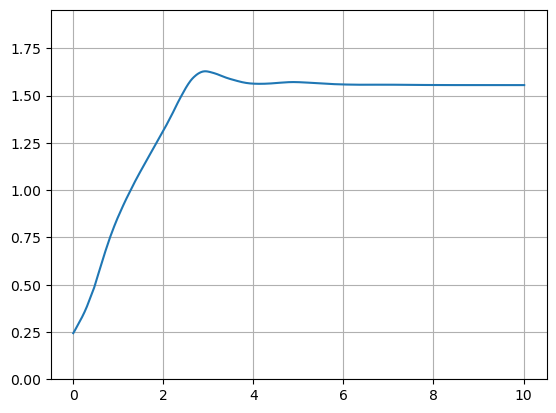

In [9]:
temp=pd.read_csv('./monitor_0.2/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 

plt.plot(data['Time'],data['Wetted'])
plt.ylim([0,np.max(data['Wetted']*1.2)])
plt.grid()
plt.show()

In [38]:
data

,Timestep,Time,VOF,VOF.1,Total,Drop,Wetted,CL,CA,CA.1,C,alpha
1,0.0,0.00,1.0,0.0,4.18871,1.981570,0.243904,0.000000,2.71520,155.570007,0.243904,0.000000
2,1.0,0.01,1.0,0.0,4.18987,1.981570,0.254136,1.023270,2.69728,154.542999,0.305912,0.040265
3,2.0,0.02,1.0,0.0,4.19108,1.981570,0.264851,1.071420,2.67714,153.389008,0.363464,0.080908
4,3.0,0.03,1.0,0.0,4.19235,1.981570,0.276034,1.118370,2.65450,152.091995,0.422730,0.121546
5,4.0,0.04,1.0,0.0,4.19369,1.981570,0.287655,1.162090,2.62919,150.641006,0.483917,0.161594
...,...,...,...,...,...,...,...,...,...,...,...,...
497,496.0,4.96,1.0,0.0,4.11351,0.945532,1.555340,0.044335,1.05938,60.697899,1.240210,0.141384
498,497.0,4.97,1.0,0.0,4.11336,0.944755,1.555770,0.042962,1.05899,60.675701,1.248460,0.137244
499,498.0,4.98,1.0,0.0,4.11322,0.943990,1.556190,0.041467,1.05866,60.657001,1.257590,0.132701
500,499.0,4.99,1.0,0.0,4.11308,0.943237,1.556590,0.039899,1.05840,60.641998,1.267310,0.127906
